In [1]:
import pandas as pd
import csv
import os

#reading and creating dataframes
main = pd.read_csv("Floor_data.csv")
ethdata = pd.read_csv("Ethereum Historical Data - Investing.com.csv")
bidcoindata = pd.read_csv("Bitcoin Historical Data - Investing.com.csv")
polygondata = pd.read_csv("Polygon Historical Data - Investing.com.csv")
sp500data = pd.read_csv("S&P 500 Historical Data.csv")
nikkeidata = pd.read_csv("Nikkei 225 Historical Data.csv")
ftsedata = pd.read_csv("FTSE 100 Historical Data.csv")
bsedata = pd.read_csv("BSE Sensex 30 Historical Data.csv")
chinxdata = pd.read_csv("1322 Historical Data.csv")
golddata = pd.read_csv("Gold Futures Historical Data.csv")
tipsdata = pd.read_csv("United States 10-Year TIPS Bond Yield Historical Data.csv")
print("reading the files completed")

#changing to datetimeformat
main["Date"] = pd.to_datetime(main["Date"], format="%d/%m/%Y")
ethdata["Date"] = pd.to_datetime(ethdata["Date"])
bidcoindata["Date"] = pd.to_datetime(bidcoindata["Date"])
polygondata["Date"] = pd.to_datetime(polygondata["Date"])
sp500data["Date"] = pd.to_datetime(sp500data["Date"])
nikkeidata["Date"] = pd.to_datetime(nikkeidata["Date"])
ftsedata["Date"] = pd.to_datetime(ftsedata["Date"])
bsedata["Date"] = pd.to_datetime(bsedata["Date"])
chinxdata["Date"] = pd.to_datetime(chinxdata["Date"])
golddata["Date"] = pd.to_datetime(golddata["Date"])
tipsdata["Date"] = pd.to_datetime(tipsdata["Date"])
print("coverting to datetime format completed")

#keeping on required data columns
keep_columns = ["Date", "Price"]
ethdata = ethdata.drop(columns=[col for col in ethdata.columns if not any([col == idx for idx in keep_columns])])
bidcoindata = bidcoindata.drop(columns=[col for col in bidcoindata.columns if not any([col == idx for idx in keep_columns])])
polygondata = polygondata.drop(columns=[col for col in polygondata.columns if not any([col == idx for idx in keep_columns])])
sp500data = sp500data.drop(columns=[col for col in sp500data.columns if not any([col == idx for idx in keep_columns])])
ftsedata = ftsedata.drop(columns=[col for col in ftsedata.columns if not any([col == idx for idx in keep_columns])])
nikkeidata = nikkeidata.drop(columns=[col for col in nikkeidata.columns if not any([col == idx for idx in keep_columns])])
bsedata = bsedata.drop(columns=[col for col in bsedata.columns if not any([col == idx for idx in keep_columns])])
chinxdata = chinxdata.drop(columns=[col for col in chinxdata.columns if not any([col == idx for idx in keep_columns])])
golddata = golddata.drop(columns=[col for col in golddata.columns if not any([col == idx for idx in keep_columns])])
tipsdata = tipsdata.drop(columns=[col for col in tipsdata.columns if not any([col == idx for idx in keep_columns])])
print("dropping unrequired columns completed")

#renaming columns
ethdata = ethdata.rename(columns={"Price": "Eth_Price"})
bidcoindata = bidcoindata.rename(columns={"Price": "Bidcoin_Price"})
polygondata = polygondata.rename(columns={"Price": "polygon_Price"})
sp500data = sp500data.rename(columns={"Price": "sp500_Price"})
ftsedata = ftsedata.rename(columns={"Price": "ftse_Price"})
nikkeidata = nikkeidata.rename(columns={"Price": "nikkei_Price"})
bsedata = bsedata.rename(columns={"Price": "bse_Price"})
chinxdata = chinxdata.rename(columns={"Price": "chinx_Price"})
golddata = golddata.rename(columns={"Price": "gold_Price"})
tipsdata = tipsdata.rename(columns={"Price": "tips_Price"})
print("renaming completed")

#merging the dataframes
finaldf = pd.merge(main, ethdata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, bidcoindata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, polygondata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, sp500data , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, nikkeidata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, ftsedata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, bsedata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, chinxdata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, golddata , left_on="Date", right_on="Date", how ="left")
finaldf = pd.merge(finaldf, tipsdata , left_on="Date", right_on="Date", how ="left")
print("Mering completed")


finaldf['Date'] = pd.to_datetime(finaldf['Date'], format="%d/%m/%Y")
finaldf = finaldf.set_index("Date")
groups = finaldf.groupby('Collection')
filled_groups = [group.bfill().ffill() for _, group in groups]
# combine filled groups back into a single dataframe
finaldf_filled = pd.concat(filled_groups).reset_index()

finaldf_filled.to_csv('final3_out.csv', index=False)

nan_counts = finaldf_filled.isna().sum()
print(nan_counts)



reading the files completed
coverting to datetime format completed
dropping unrequired columns completed
renaming completed
Mering completed
Date               0
Collection         0
ETH_floor_price    0
sales_count        0
Eth_Price          0
Bidcoin_Price      0
polygon_Price      0
sp500_Price        0
nikkei_Price       0
ftse_Price         0
bse_Price          0
chinx_Price        0
gold_Price         0
tips_Price         0
dtype: int64


In [3]:
!pip install node2vec


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from keras.models import Sequential, load_model
import os
from keras.layers import Dense, LSTM, Dropout,GRU
import time
import helper
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from IPython.display import clear_output
from keras.callbacks import ModelCheckpoint, EarlyStopping
import csv
import matplotlib.dates as mdates
from google.colab import files
import networkx as nx
from node2vec import Node2Vec


In [45]:
start_time = time.time()
#reading the file into csv
main1 = pd.read_csv("final3_out.csv")
nftuse= main1.groupby("Collection").agg({'ETH_floor_price':'mean','sales_count':'mean'}).rename(columns={"ETH_floor_price":"avg_floor",'sales_count': 'avg_sales'}).reset_index()
nftuse = nftuse[(nftuse["avg_floor"]>=50) & (nftuse['avg_sales']>15)]
print(nftuse)
main = pd.merge(main1,nftuse,on="Collection")
print(main.shape, "shape of main")
#ensuring all the columns are in corrent format
main['Date'] = pd.to_datetime(main['Date'])
cols = list(main)[2:]
print(list(main))
main[cols] = main[cols].replace(',', '', regex=True).astype(float)
'''
main['ETH_floor_price2'] = main['ETH_floor_price']**2
main['ETH_floor_price3'] = main['ETH_floor_price']**3
main['ETH_floor_price5'] = main['ETH_floor_price']**5
main['ETH_floor_pricesin'] = np.sin(main['ETH_floor_price'])
main['ETH_floor_pricecos'] = np.cos(main['ETH_floor_price'])
main['ETH_floor_priceexp'] = np.exp(main['ETH_floor_price'])

main = pd.concat([main.iloc[:,0:3], main.iloc[:,16:],main.iloc[:,3:16]],axis=1)
'''
print(len(list(main)))
print("correct formating completed:", time.time() - start_time)



              Collection  avg_floor  avg_sales
87  bored-ape-yacht-club  72.991272  21.227357
(541, 16) shape of main
['Date', 'Collection', 'ETH_floor_price', 'sales_count', 'Eth_Price', 'Bidcoin_Price', 'polygon_Price', 'sp500_Price', 'nikkei_Price', 'ftse_Price', 'bse_Price', 'chinx_Price', 'gold_Price', 'tips_Price', 'avg_floor', 'avg_sales']
16
correct formating completed: 0.7563285827636719


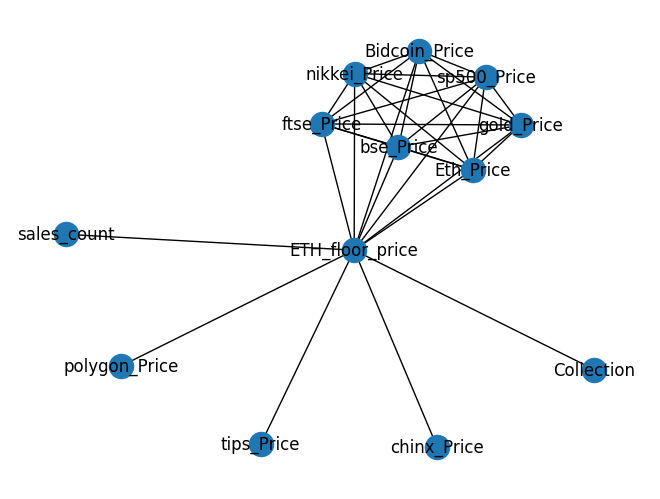

In [34]:
row = list(main)
graph = nx.Graph()
nodes = [row[2],row[3],row[4],row[5],row[6], row[7],row[8],row[9],row[10], row[11],row[12],row[13]]
edges = [(row[2],row[1]),(row[2],row[3]),(row[2],row[4]),(row[2],row[4]),(row[2],row[5]),(row[2],row[6]),(row[2],row[7]),(row[2],row[8]),(row[2],row[9]),(row[2],row[10]),(row[2],row[11]),(row[2],row[12]),(row[2],row[13]),\
         (row[4],row[7]),(row[4],row[8]),(row[4],row[9]),(row[4],row[10]),(row[4],row[12]),(row[4],row[5]),\
         (row[5],row[7]),(row[5],row[8]),(row[5],row[9]),(row[5],row[10]),(row[5],row[12]),\
         (row[7],row[8]),(row[7],row[9]),(row[7],row[10]),(row[7],row[12]),\
         (row[8],row[9]),(row[8],row[10]),(row[8],row[12]),\
         (row[9],row[10]),(row[9],row[12]),\
         (row[10],row[12])]

# Add nodes and edges to the graph
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=True)
labels = nx.get_node_attributes(graph, 'label')
nx.draw_networkx_labels(graph,pos, labels=labels, font_size=12)
plt.show()

In [ ]:
# create a graph for each row
graphs = []
for i,row in  main.iterrows():
    # create an undirected graph
    graph = nx.Graph()
    nodes = [row[2],row[3],row[4],row[5],row[6], row[7],row[8],row[9],row[10], row[11],row[12],row[13]]
    edges = [(row[2],row[1]),(row[2],row[3]),(row[2],row[4]),(row[2],row[4]),(row[2],row[5]),(row[2],row[6]),(row[2],row[7]),(row[2],row[8]),(row[2],row[9]),(row[2],row[10]),(row[2],row[11]),(row[2],row[12]),(row[2],row[13]),\
            (row[4],row[7]),(row[4],row[8]),(row[4],row[9]),(row[4],row[10]),(row[4],row[12]),(row[4],row[5]),\
            (row[5],row[7]),(row[5],row[8]),(row[5],row[9]),(row[5],row[10]),(row[5],row[12]),\
            (row[7],row[8]),(row[7],row[9]),(row[7],row[10]),(row[7],row[12]),\
            (row[8],row[9]),(row[8],row[10]),(row[8],row[12]),\
            (row[9],row[10]),(row[9],row[12]),\
            (row[10],row[12])]
    # Add nodes and edges to the graph
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)     
    graphs.append(graph)

graph = nx.compose_all(graphs)

# train the Node2Vec model on the graphs
node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

# get the node embeddings for the third column
node_embeddings = np.array([model.wv[str(row[2])] for i, row in main.iterrows()])



In [64]:
print(node_embeddings[0])
print(node_embeddings[1])

[ 0.91595817  0.12360413 -0.14729235 -0.4360433  -0.03032809 -0.69708544
  0.12965222 -0.36278883 -0.32730415  0.08326764  0.22647884 -0.04258374
 -0.9055767   0.07634004 -0.38229048  0.299131   -0.34650415 -0.4764866
  0.00452042 -0.1094422   0.60218006  0.16947122 -0.3228441  -1.0577592
  0.0111748   0.23241496 -0.32206428  0.20134094 -0.36220098  0.5473946
 -0.19792098  0.13187942  0.3487286  -0.49967757  0.03284955  0.42622837
 -0.0810543  -0.9026539   0.8266014  -0.21394019 -0.22072177 -0.35735273
 -0.43365425  0.13395394 -0.18385556  0.01538879  0.07382333 -0.0400888
 -0.6932455   0.7206287  -0.0599056  -0.15367973 -0.26443642  0.01654088
  0.18783744 -0.20088087  0.07721791 -0.09934195  0.23410681  0.6896263
 -1.0854845   0.09506363  0.06440051 -0.10711685]
[-8.4222764e-02  2.2865455e-01  4.1106230e-01 -8.3455056e-02
 -2.6068780e-01  5.7151925e-02 -2.7161935e-01 -4.7616002e-01
 -1.2793927e-01  2.4356493e-01  6.9718021e-01 -5.1115847e-01
 -1.7305632e-01 -3.8713703e-01 -2.9874468e

In [49]:
#creating onehotencoding for collection variable and merging it with main dataframe
start_time = time.time()
print(main.shape)

node_df = pd.DataFrame(node_embeddings)
main1 = pd.concat([main,node_df],axis=1)
print(main1.shape)

enc = OneHotEncoder()
enc.fit(main1[['Collection']])
onehot = enc.transform(main1[['Collection']]).toarray()
onehotdf = pd.concat([main1,pd.DataFrame(onehot)],axis=1)
print("one hot encoding completed:", time.time() - start_time)
print(list(onehotdf))

#sorting and Normalizing the dataset
start_time = time.time()
onehotdf = onehotdf.sort_values(by=["Collection", "Date"])
#scaler = MinMaxScaler()
#onehotdf[['ETH_floor_price', 'sales_count', 'Eth_Price', 'Bidcoin_Price', 'polygon_Price', 'sp500_Price', 'nikkei_Price', 'ftse_Price', 'bse_Price', 'chinx_Price', 'gold_Price', 'tips_Price', 'avg_floor', 'avg_sales']] = scaler.fit_transform(onehotdf[['ETH_floor_price','ETH_floor_price2', 'ETH_floor_price3', 'ETH_floor_price5', 'ETH_floor_pricesin', 'ETH_floor_pricecos', 'ETH_floor_priceexp', 'sales_count', 'Eth_Price', 'Bidcoin_Price', 'polygon_Price', 'sp500_Price', 'nikkei_Price', 'ftse_Price', 'bse_Price', 'chinx_Price', 'gold_Price', 'tips_Price', 'avg_floor', 'avg_sales']])
print("sorint and scaling completed:", time.time() - start_time)
onehotdf.shape


(541, 16)
(541, 80)
one hot encoding completed: 0.011094331741333008
['Date', 'Collection', 'ETH_floor_price', 'sales_count', 'Eth_Price', 'Bidcoin_Price', 'polygon_Price', 'sp500_Price', 'nikkei_Price', 'ftse_Price', 'bse_Price', 'chinx_Price', 'gold_Price', 'tips_Price', 'avg_floor', 'avg_sales', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 0]
sorint and scaling completed: 0.0038650035858154297


(541, 81)

In [50]:
#molding the data into correct input format
start_time = time.time()
rolling = 30
future = 14
def windowdata(df):
    temp = []
    for idx in range(rolling, len(df)-(future-1)):
        temp.append(df[idx-rolling:idx])
    return np.array(temp)
x = []
y = []
z = []
w = []

for num in onehotdf["Collection"].unique():
    nft_df = onehotdf[onehotdf["Collection"] == num].reset_index(drop=True)
    nft_seq = windowdata(nft_df)
    x.append(nft_seq)
    y.append(nft_df.loc[rolling+(future-1):,"ETH_floor_price"].values.reshape(-1,1))
    z.append(nft_df.loc[rolling+(future-1):,"Date"].values.reshape(-1,1))
    w.append(nft_df.loc[rolling+(future-1):,"Collection"].values.reshape(-1,1))
print("correct format completed:", time.time() - start_time)


correct format completed: 0.40981435775756836


In [51]:
#creating training and valset
start_time = time.time()
trainx = []
trainy = []
valx = []
valy = []
traindate = []
valdate = []
valcollection = []
for idx in range(len(x)):
    edge = round(0.8*x[idx].shape[0])
    for num in range(edge):
        trainx.append(x[idx][num][:,16:])
        trainy.append(y[idx][num,0])
        traindate.append(z[idx][num,0])
    for num in range(edge,x[idx].shape[0]):
        valx.append(x[idx][num][:,16:])
        valy.append(y[idx][num,0])
        valdate.append(z[idx][num,0])
        valcollection.append(w[idx][num,0])


trainx, trainy, valx, valy = np.array(trainx).astype(float), np.array(trainy).astype(float), np.array(valx).astype(float), np.array(valy).astype(float)
print(trainx.shape, "trainx")
print(trainy.shape, "trainy")
print(valx.shape, "valx")
print(valy.shape, "valy")
print(len(valdate),"valdate")
print(len(valcollection),"valdate")
print("spliting the data into training and valset completed:", time.time() - start_time)


(398, 30, 65) trainx
(398,) trainy
(100, 30, 65) valx
(100,) valy
100 valdate
100 valdate
spliting the data into training and valset completed: 0.11633729934692383


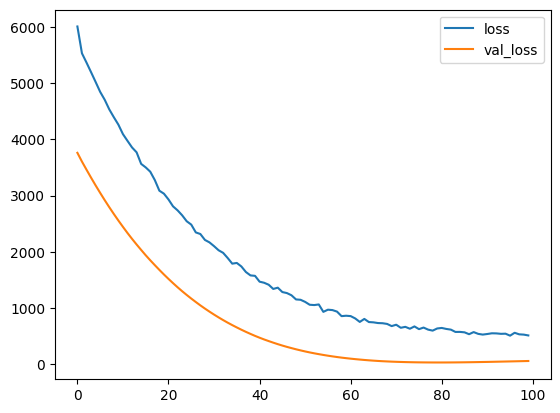


Epoch 100: val_loss did not improve from 26.54206
7/7 [==============================] - 1s 178ms/step - loss: 508.3124 - val_loss: 52.8610
creating and training model completed: 1289.9353051185608


In [53]:
#creating a model
start_time = time.time()
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(trainx.shape[1], trainx.shape[2])))
model.add(Dropout(0.4))
model.add(GRU(units=32, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(units=16, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))

class PlotLoss(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show()
        
plot_loss = PlotLoss()
early_stop = EarlyStopping(monitor='val_loss', patience=25, verbose=1)
checkpoint_filepath = 'best_model.h6'
# Define the callback to save only the best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)


# Compile model
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
model.summary()

# Train model
history = model.fit(trainx, trainy, validation_data=(valx, valy), epochs=100, batch_size=64, verbose =1,callbacks=[plot_loss, early_stop,checkpoint_callback])
print("creating and training model completed:", time.time() - start_time)



In [54]:
#accuracy calculations
def accuracy(df, per):
    df["variance_per"] = ((df["val_true_price"] -df["val_predicted_price"])/df["val_true_price"]*100).abs()
    #df["correct_pred"] = np.where(((df["variance_per"]<=per) &(df["variance_per"]>=-per)),1,0)
    result = df.groupby('Collection').agg({'val_true_price':'mean','variance_per':'sum','Collection':'count'}).rename(columns={"val_true_price":"average_true_price",'variance_per':'variance_total','Collection':'no_of_dates'}).reset_index()
    result["per_variance"] = result["variance_total"]/result["no_of_dates"]*100
    return result, 100 - df["variance_per"].sum()/result["no_of_dates"].sum(), result["no_of_dates"]


In [ ]:
#predicting the future prices
start_time = time.time()
best_model = load_model(checkpoint_filepath)
val_predicted_price = np.squeeze(best_model.predict(valx))
#val_predicted_price_copies = np.repeat(val_predicted_price, 20,axis=1)
#val_predicted_price = scaler.inverse_transform(val_predicted_price_copies)[:,0]
#valy_copies = np.repeat(valy.reshape(-1,1), 20,axis=1)
#val_true_price = scaler.inverse_transform(valy_copies)[:,0]
val_true_price = valy
print("predicting completed:", time.time() - start_time)
print(np.array(valdate).shape)
print(np.array(valcollection).shape)
print(val_predicted_price.shape)
print(val_true_price.shape)

cum_results = pd.DataFrame({"Date":np.array(valdate), "Collection":np.array(valcollection),"val_predicted_price":val_predicted_price, "val_true_price":val_true_price})
result_table , final_per,check = accuracy(cum_results,10)
print("prediction accuracy",final_per)
result_table.to_csv('results.csv', index=False)
cum_results.to_csv("full_results.csv", index=False)

print(check)

#displaying results
start_time = time.time()
df_forecast = pd.DataFrame({"Date":np.array(valdate), "val_predicted_price":val_predicted_price})
df_true = pd.DataFrame({"Date":np.array(valdate), "val_true_price":val_true_price})
valunidates = np.unique(valdate)


valuespred = [df_forecast.loc[df_forecast['Date'] == a, 'val_predicted_price'].sum() for a in valunidates]
valuestrue = [df_true.loc[df_true['Date'] == a, 'val_true_price'].sum() for a in valunidates]

valunidates = pd.to_datetime(valunidates, format='%Y-%m-%d')

plt.plot(valunidates, valuespred, label="predicted values")
plt.plot(valunidates, valuestrue, label="true values")
plt.xlabel('Predicted Date')
plt.ylabel('Floor Price')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # set ticks every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format dates as year-month-day

# rotate the tick labels for better visibility
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()
print("display results completed:", time.time() - start_time)
plt.savefig('my_plot.png')
# download the file to your local computer
files.download('my_plot.png')

In [68]:
print(valx[1])
print(valx[2])

[[-0.44752049  0.09204505 -0.02754325 ... -0.24760599 -0.56467682
   1.        ]
 [-0.0577599  -0.55291998  0.64704919 ... -0.14812484  0.11688784
   1.        ]
 [-0.0577599  -0.55291998  0.64704919 ... -0.14812484  0.11688784
   1.        ]
 ...
 [-0.54686213 -0.41090757  0.3670702  ... -0.48489657 -0.25323278
   1.        ]
 [ 0.06587317 -0.41925704  0.762106   ... -0.93623775 -0.10402913
   1.        ]
 [-0.0577599  -0.55291998  0.64704919 ... -0.14812484  0.11688784
   1.        ]]
[[-0.0577599  -0.55291998  0.64704919 ... -0.14812484  0.11688784
   1.        ]
 [-0.0577599  -0.55291998  0.64704919 ... -0.14812484  0.11688784
   1.        ]
 [ 0.08912598 -0.27457768  0.54284602 ... -0.07544301  0.52180171
   1.        ]
 ...
 [ 0.06587317 -0.41925704  0.762106   ... -0.93623775 -0.10402913
   1.        ]
 [-0.0577599  -0.55291998  0.64704919 ... -0.14812484  0.11688784
   1.        ]
 [-0.0577599  -0.55291998  0.64704919 ... -0.14812484  0.11688784
   1.        ]]


In [ ]:
a, b, c = trainx.shape
#for idx in range(len)

with open('output.csv', mode='w', newline='') as file:
  # Create a CSV writer object
  writer = csv.writer(file)
  for idx in range(a):
    writer.writerow(np.array([traindate[idx],trainy[idx]]))
    for num in range(b):
      writer.writerow(trainx[idx][num])

In [ ]:
trainx[0][0]

array([0.08982036, 0.08982036, 0.08982036, 0.08982036, 0.08982036,
       0.08982036, 0.08982036, 0.08856089, 0.52585915, 0.54195514,
       0.30933544, 0.59900945, 0.93017312, 0.21905299, 0.65129904,
       0.43089858, 0.3057711 , 0.85961945, 0.        , 0.        ,
       1.        ])